# Vamos aplicar o que aprendemos sobre regressões lineares
*   Complete com o código em falta
*   Sempre que necessário, **substitua** ___

---

dataset: [fonte](https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction)

---


Corra a primeira célula de código para obter o dataframe com que vamos trabalhar

In [1]:
# faça o upload do ficheiro csv associado à atividade

# vamos importar a biblioteca
import pandas as pd
import numpy as np

# vamos importar o dataframe do ficheiro .csv
df_real_estate = (pd
                  .read_csv("C:/Users/yfreitas/Documents/pythonSamples/Machine Learning/Files/Real estate.csv")
                  .drop(["No",
                         "X1 transaction date",
                         "X4 number of convenience stores"], axis = 1))

In [3]:
df_real_estate.head()

,X2 house age,X3 distance to the nearest MRT station,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,24.98298,121.54024,37.9
1,19.5,306.59470,24.98034,121.53951,42.2
2,13.3,561.98450,24.98746,121.54391,47.3
3,13.3,561.98450,24.98746,121.54391,54.8
4,5.0,390.56840,24.97937,121.54245,43.1


In [2]:
# veja as 5 primeiras linhas do dataframe
df_real_estate.head()
# veja a forma do dataframe: quantas linhas, quantas colunas?
df_real_estate.shape
# veja a informação sobre o dataframe
df_real_estate.info()
# veja a descrição das variáveis numéricas
df_real_estate.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X5 latitude                             414 non-null    float64
 3   X6 longitude                            414 non-null    float64
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(5)
memory usage: 16.3 KB


,X2 house age,X3 distance to the nearest MRT station,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,24.969030,121.533361,37.980193
std,11.392485,1262.109595,0.012410,0.015347,13.606488
min,0.000000,23.382840,24.932070,121.473530,7.600000
25%,9.025000,289.324800,24.963000,121.528085,27.700000
50%,16.100000,492.231300,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,25.014590,121.566270,117.500000


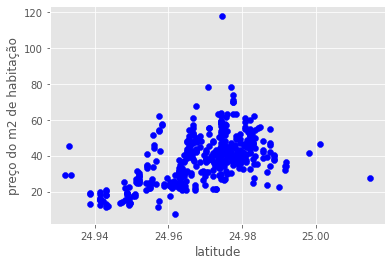

In [4]:
# importe o matplotlib.pyplot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
x_variable = df_real_estate["X5 latitude"]
y_variable = df_real_estate["Y house price of unit area"]
plt.scatter(x_variable, y_variable, color = 'b')
plt.ylabel("preço do m2 de habitação")
plt.xlabel('latitude')
plt.show()

In [5]:
# defina a variável alvo ("Y house price of unit area")
target_variable = "Y house price of unit area"

# train_test split usando a função train_test_split
X = df_real_estate.drop([target_variable], axis = 1)
y = df_real_estate[target_variable]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 12)

In [6]:
# escolha "X5 latitude" como variável independente
x_variable = 'X5 latitude'
X_1_feature = X_train[[x_variable]]

# importe o modelo
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_1_feature, y_train)

# faça previsão para os pontos de teste
y_reg = lin_reg.predict(X_test[[x_variable]])

# veja os coeficientes da regressão
m = lin_reg.coef_[0]
b = lin_reg.intercept_
print("m: {}; b: {}".format(m , b))

# verifique o r2 (round -> 3)
print("r2: {}".format(lin_reg.score(X_test[[x_variable]], y_test).round(3)))

m: 648.6706370922496; b: -16157.862670597053
r2: 0.206


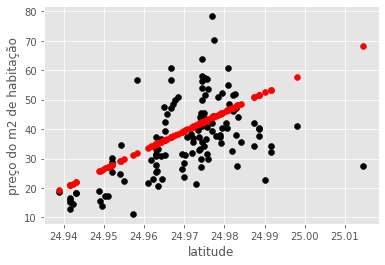

In [7]:
# visualize o resultado para o teste
plt.scatter(X_test[[x_variable]], y_test, color = 'k')
plt.scatter(X_test[[x_variable]], y_reg, color = 'r')
plt.ylabel("preço do m2 de habitação")
plt.xlabel('latitude')
plt.show()

In [8]:
# vamos codificar o nome das variáveis
columns_names = ["x1", "x2", "x3", "x4", "y"]
df_real_estate.columns = columns_names

In [9]:
# importe o modelo de regressão linear
from sklearn.linear_model import LinearRegression
lin_reg_all = LinearRegression()
lin_reg_all.fit(X_train, y_train)
y_pred = lin_reg_all.predict(X_test)

# verifique o r2 (round -> 3)
lin_reg_all.score(X_test, y_test).round(3)

0.566

In [10]:
# importe o modelo de Ridge
from sklearn.linear_model import Ridge

# considere alpha = 0.3
ridge_reg = Ridge(alpha = 0.3)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# verifique o r2 (round -> 3)
ridge_reg.score(X_test, y_test).round(3)

0.547

In [11]:
# importe o modelo de Lasso
from sklearn.linear_model import Lasso

# considere alpha = 0.5
lasso_reg = Lasso(alpha = 0.5)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

# verifique o r2 (round -> 3)
lasso_reg.score(X_test, y_test).round(3)

0.54